### Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

### В следующую ячейку нужно вписать путь до файла train.csv

In [2]:
path_to_train_csv = r'D:\Data science Education\HomeWork\data_science_libraries\train.csv'

### Следующие ячейки: чтение CSV - файла, задание поля id как Индекса

In [3]:
df = pd.read_csv(filepath_or_buffer=path_to_train_csv, encoding='utf-8')

In [4]:
df = df.set_index('Id')

In [5]:
df.sort_index(inplace=True)

In [6]:
df.head(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
0,0,1.0,109.144492,84.613939,15.0,6,15.0,2011,0.319809,B,B,25,4756,16,2857.0,5,8,B,289034.391871
2,2,1.0,34.472263,16.069376,5.0,5,18.0,1969,0.000000,B,B,33,7425,1,NaN,2,5,B,174548.966339
5,5,3.0,57.607965,38.955672,5.0,3,9.0,1974,0.150818,B,B,16,3433,4,2643.0,4,5,B,258091.883679
6,6,1.0,42.466813,40.010160,1.0,14,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,127196.762031
10,6,3.0,75.888156,78.324716,1.0,11,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,218500.747041


In [7]:
len(df) - df.count()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 16798
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01


In [10]:
df['LifeSquare'].median()

32.78126019215574

### Анализируя имеющиеся данные, вижу, что в столбце LifeSquare есть пропуски. Предполагаю, что жилая площадь как-то соотносится с общей площадью дома, поэтому попробую заполнить пропуски при помощи линейной регрессии

In [11]:
Y_train = df[df['LifeSquare'].notna()]['LifeSquare']

In [12]:
X_train = df[df['LifeSquare'].notna()]['Square']

### Анализируя график ниже, вижу, что есть выбросы по Y. Устраню эти выбросы

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


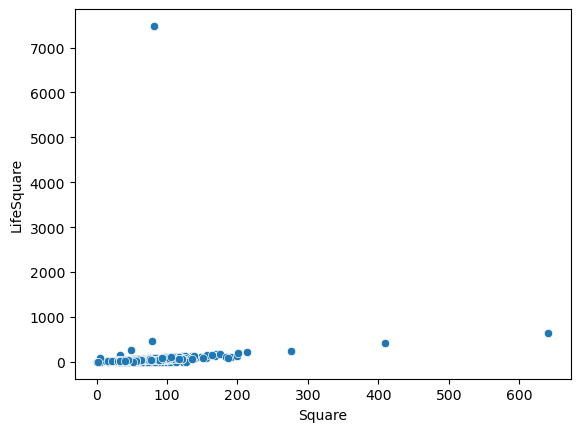

In [13]:
sns.scatterplot(X_train, Y_train);

In [14]:
n = pd.DataFrame(Y_train)
n = n[(n['LifeSquare'] > 150) | (n['LifeSquare'] < 15)]
m = n.index.values
Y_train.drop(labels=m, inplace = True)
X_train.drop(labels=m, inplace = True)

C:\Users\lazar\AppData\Local\Temp\ipykernel_10360\3102305369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train.drop(labels=m, inplace = True)
C:\Users\lazar\AppData\Local\Temp\ipykernel_10360\3102305369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(labels=m, inplace = True)


### Анализируя график ниже, вижу, что есть выбросы по X. Устраню эти выбросы

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


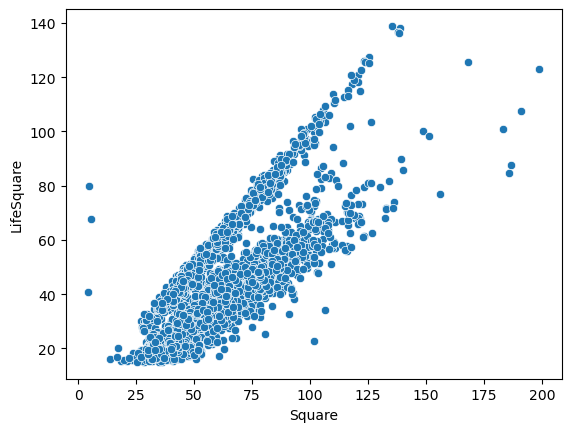

In [15]:
sns.scatterplot(X_train, Y_train);

In [16]:
n = pd.DataFrame(X_train)
n = n[(n['Square'] > 130) | (n['Square'] < 25)]
m = n.index.values
Y_train.drop(labels=m, inplace = True)
X_train.drop(labels=m, inplace = True)

C:\Users\lazar\AppData\Local\Temp\ipykernel_10360\1658244249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train.drop(labels=m, inplace = True)
C:\Users\lazar\AppData\Local\Temp\ipykernel_10360\1658244249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(labels=m, inplace = True)


### На графике ниже - данные после устранения выбросов. Прослеживается взаимосвязь между данными, но слабая

C:\Users\lazar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


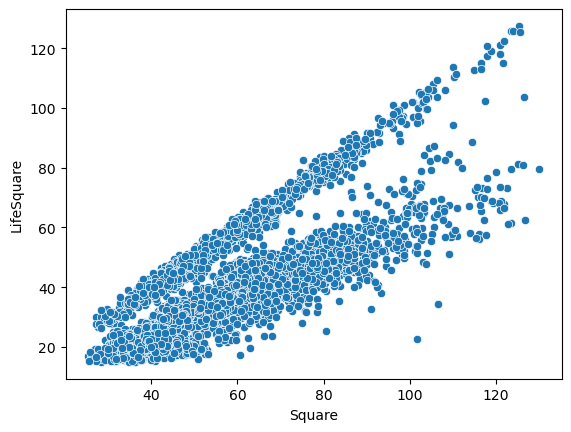

In [17]:
sns.scatterplot(X_train, Y_train);

In [18]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), Y_train.values)

LinearRegression()

In [19]:
y_pred = lr.predict(pd.DataFrame(X_train))

C:\Users\lazar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [20]:
r2_score(Y_train, y_pred)

0.6602651340261172

### Получил коэффициент R^2 равный 0.65. Связь слабая, но, на мой взгляд, это лучше, чем просто медианное или среднее значение. Заполню согласной данной регрессии пустные значения в колонке LifeSquare:

In [21]:
df.reset_index(inplace=True)

In [22]:
ar = list(df[df['LifeSquare'].isna()].index)
for indx in ar:
    temp = df.iloc[indx]['Square']
    df.iloc[indx, 4] = lr.predict(np.array(temp).reshape(1,-1))

In [23]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

### На мой взгляд, столбец с пропусками Healthcare_1 достаточно хорошо распределен и не несет какого-то "физического" смысла, и навряд ли от чего-то зависит. Предполагаю заполнить данный столбец медианными значениями

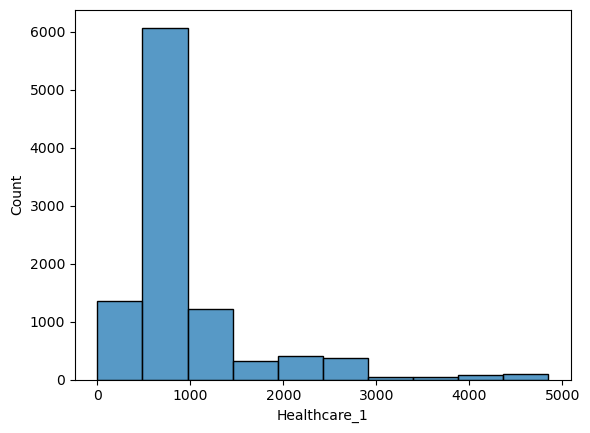

In [35]:
sns.histplot(data = df[df['Healthcare_1'].notnull()]['Healthcare_1'], bins=10);

In [36]:
med = df[df['Healthcare_1'].notnull()]['Healthcare_1'].median()


med

900.0

### Как видно, медианное значение попадает в группу наиболее распространенных значений

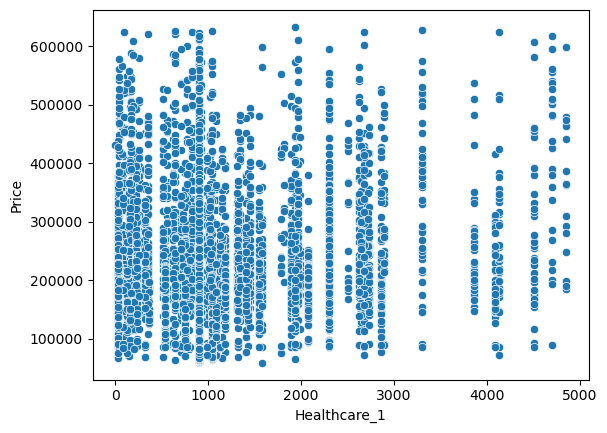

In [48]:
sns.scatterplot(x=df[df['Healthcare_1'].notnull()]['Healthcare_1'], y=df[df['Healthcare_1'].notnull()]['Price']);

### Проанализировав совместные графиик Healthcare_1 с другими переменными, не увидел никакой зависимости. В результате принял решение заполнить пропуски Healthcare_1 медианными значениями

In [37]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = med

In [38]:
len(df) - df.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

### На данном этапе обработка пропущенных значений закончена